In [1]:
import torch
import torch.nn.functional as F
from torch import nn
import matplotlib.pyplot as plt

In [2]:
words = open('data/names.txt', 'r').read().splitlines()

In [3]:
# create lookup tables for string to index and index to string
chars = sorted(list(set(''.join(words))))
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}

In [4]:
# create the training set of bigrams (x,y)
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
xenc = F.one_hot(xs, num_classes=27).float()
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

number of examples:  228146


In [5]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.l = nn.Linear(27, 27)
        self.a = nn.LogSoftmax(dim=1)
    def forward(self, x):
        out = self.l(x)
        out = self.a(out)
        return out

In [6]:
model = NN()
loss_function = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=10, weight_decay=1e-2)
losses = []

In [7]:
for i in range(100):
    outs = model.forward(xenc)
    loss = loss_function(outs, ys)
    losses.append(loss.item())
    model.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 10 == 0: print(loss.item())

3.29360032081604
2.7271950244903564
2.7045462131500244
2.700068950653076
2.6990318298339844
2.698772668838501
2.6987051963806152
2.6986868381500244
2.6986820697784424
2.6986804008483887


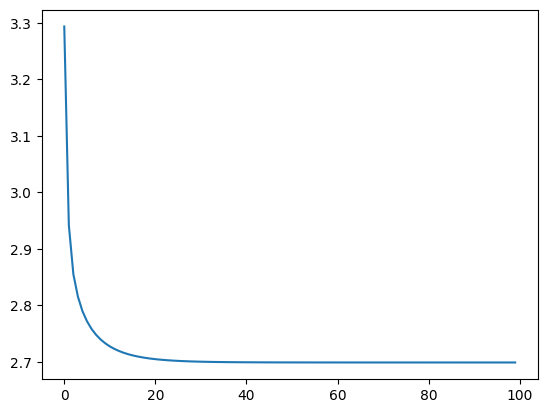

In [8]:
plt.plot(losses)